In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import os.path

import cv2 as cv
import numpy as np
from peeptree.processing import ImageProcessor
from peeptree.model import ImageFeatureExtractor, TreeClassifierSVM

# defining necessary paths
image_extensions = ["jpg", "png"]
trained_clf_path = "/home/one_wizard_boi/Documents/Projects/DJI-tree-detection/peeptree/classifier.pickle"
image_dir = "/home/one_wizard_boi/Documents/Projects/DJI-tree-detection/TrainingData/OriginalImages"

# defining a target image
target_image_name = "20200126_152211.jpg"
target_image_path = os.path.join(image_dir, target_image_name)


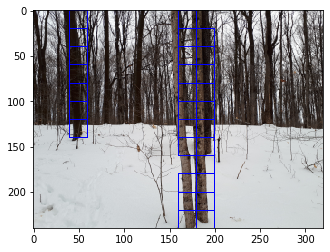

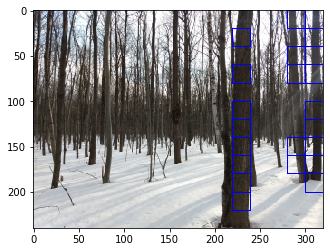

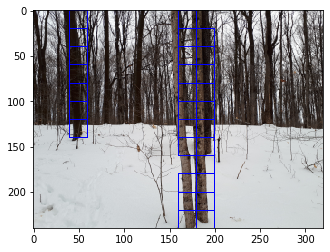

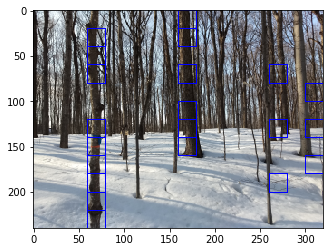

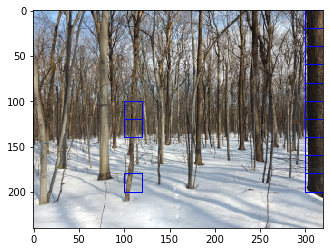

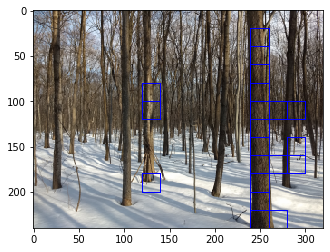

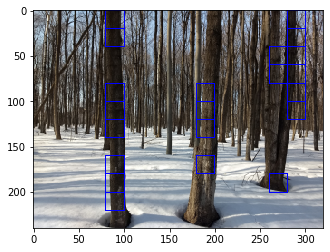

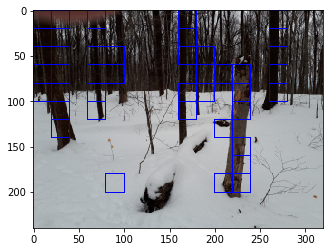

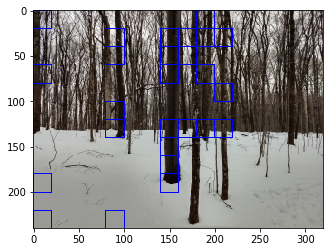

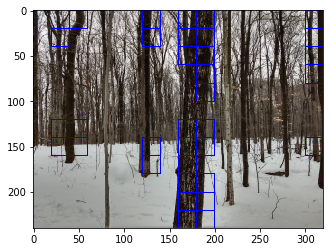

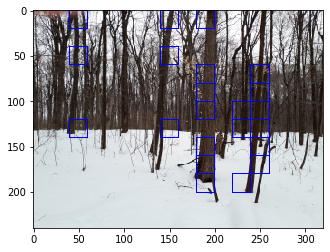

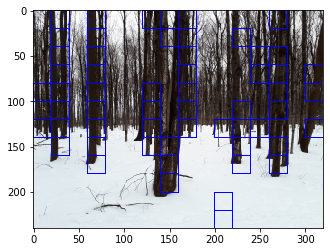

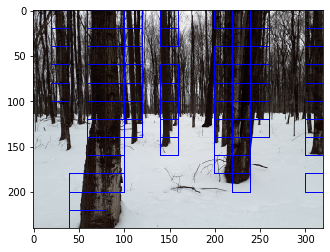

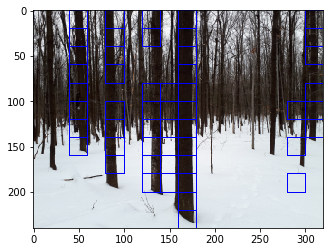

In [5]:
''' Testing the detection pipeline '''


# defining the target images
target_image_names = ["20200126_152211.jpg", "IMG_20200308_162929861.jpg", "20200126_152211.jpg", "IMG_20200308_160532716.jpg", 
                      "IMG_20200308_160439195.jpg", "IMG_20200308_160400750.jpg", "IMG_20200308_160331417.jpg", 
                      "20200126_152259.jpg", "IMG_20200126_151816507_HDR.jpg", "IMG_20200126_152153229_HDR.jpg", 
                      "20200126_152255.jpg", "20200126_151455.jpg", "20200126_151453.jpg", "20200126_151424.jpg"]

# defining the image processor
processor = ImageProcessor(trained_clf_path, block_size=20)

for img_name in target_image_names:

    image_path = os.path.join(image_dir, img_name)
    
    # loading and processing the target image
    image = cv.imread(image_path, cv.IMREAD_COLOR)
    image = processor.detect_object_segments(image)

    # displaying prcessed image
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()

In [4]:
''' Analyzing extracted feature vectors '''
import math


# loading and resizing the target image
image = cv.imread(target_image_path, cv.IMREAD_COLOR)
image = cv.resize(image, (320, 240), interpolation = cv.INTER_AREA)

# defining extraction pipeline
feature_vectors = []
feature_extractor = ImageFeatureExtractor(lbp_radius=1, lbp_n_points=8, fusion_method=1, color_space="RGB",
                                          channel_hist_n_bins = 15)

# defining a tree sgment classifier
clf = TreeClassifierSVM(trained_clf_path)

# going through the blocks of the input image
block_size = 20
n_blocks_row = 240 // 20
n_blocks_col = 320 // 20
for row_i in range(n_blocks_row):
    seg_row_start = row_i * block_size
    for col_i in range(n_blocks_col):

        # extracting current subimage
        seg_col_start = col_i * block_size
        image_seg = image[seg_row_start : seg_row_start + block_size, seg_col_start : seg_col_start + block_size]
        image_seg = np.expand_dims(image_seg, axis=0)
        
        # collecting features for detected segments
        if clf.predict(image_seg) == 1:
            feature_vectors.append(feature_extractor.transform(image_seg)[0])
                
print(feature_vectors[0])
print(len(feature_vectors[0]))

# test
math.sqrt(sum([element**2 for element in feature_vectors[0]]))

[0.335      0.06       0.0475     0.0575     0.06       0.0625
 0.055      0.0475     0.0575     0.0575     0.065      0.035
 0.0275     0.025      0.0075     0.29190196 0.23692152 0.3175
 0.0925     0.0575     0.0475     0.06       0.0675     0.06
 0.0425     0.0625     0.06       0.045      0.0375     0.02
 0.0225     0.0075     0.29206863 0.22369291 0.3325     0.0825
 0.06       0.05       0.055      0.065      0.0625     0.04
 0.06       0.06       0.045      0.035      0.0225     0.02
 0.01       0.31005882 0.20712977 0.0775     0.1275     0.07
 0.0875     0.14       0.13       0.0475     0.095      0.0775
 0.1475    ]
61


0.980724414147579